# Visualizing FordGo Bike Dataset

## Investigation Overview

- Here we investigate FordGo Bike Dataset, We will try find relationship between features of this dataset and look at the behaviors and characteristic on user_type, start_time, gender and age.

## Dataset Overview

- This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

- Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

- The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [1]:
# importing the important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
# reading the cleaned df
df = pd.read_csv('master_df.csv')

In [3]:
# look df sample
df.sample(5)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_birth_year,member_gender,member_age,start_time_month,start_time_month_num,start_time_days,start_time_hour,end_time_hour,duration_min,distance_km
232182,232182,385,2017-10-10 07:57:02.135,2017-10-10 08:03:27.799,200,2nd Ave at E 18th St,37.800214,-122.253810,163,Lake Merritt BART Station,...,1981.0,Male,39.0,October,10,Tue,7,8,6,1.061244
371562,371562,482,2017-08-22 08:37:33.772,2017-08-22 08:45:36.190,22,Howard St at Beale St,37.789756,-122.394643,45,5th St at Howard St,...,1985.0,Male,35.0,August,8,Tue,8,8,8,1.280987
291152,291152,122,2017-09-20 18:01:27.492,2017-09-20 18:03:30.073,66,3rd St at Townsend St,37.778742,-122.392741,50,2nd St at Townsend St - Coming Soon,...,1990.0,Male,30.0,September,9,Wed,18,18,2,0.292981
259285,259285,1021,2017-10-01 11:27:55.761,2017-10-01 11:44:57.011,34,Father Alfred E Boeddeker Park,37.783988,-122.412408,134,Valencia St at 24th St,...,1987.0,Male,33.0,October,10,Sun,11,11,17,3.582928
421643,421643,318,2017-07-27 09:35:03.437,2017-07-27 09:40:22.231,22,Howard St at Beale St,37.789756,-122.394643,20,Mechanics Monument Plaza (Market St at Bush St),...,1991.0,Male,29.0,July,7,Thu,9,9,5,0.423686


### FordGo Monthwise(7-month) usage

- In this seven months highest peak is october which is early-mid autumn with highest popualarity to use Ford go. with second as September and November together.
- San Francisco is best in the mid-late summer as it usually stays sunny until returning to its usual foggy weather in the late autumn/early winter months.
- And temperature aint that hot compare to summer

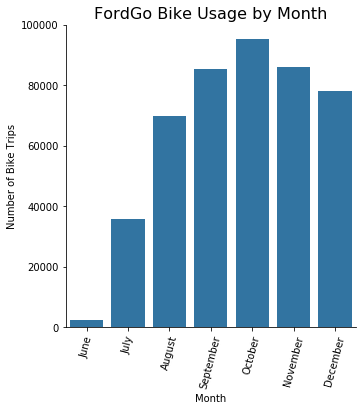

In [4]:
# month list with the seven month
month = ['June','July','August','September','October','November','December']
# monthly usage of Fordgo bike
base_col = sns.color_palette()[0]
g = sns.catplot(data = df, x = 'start_time_month', kind = 'count', color = base_col, order=month);
g.set_axis_labels('Month', 'Number of Bike Trips'),
g.set_xticklabels(rotation=75);
plt.title('FordGo Bike Usage by Month', fontsize=16);

### FordGo day wise usage in week

- Since this data is from the bay area and there mainly office people there so it likely that there won't be less i users in weekends then any other days.

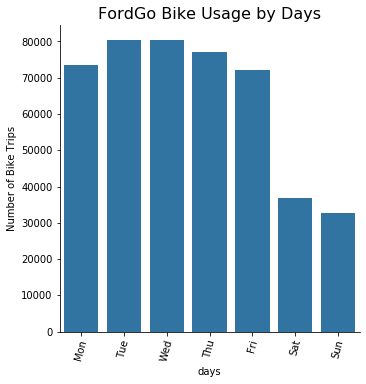

In [5]:
# day wise usage distribution
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

g = sns.catplot(data=df, x='start_time_days', kind='count', color = base_col, order = days)
g.set_axis_labels('days', 'Number of Bike Trips')
g.set_xticklabels(rotation=75)
plt.title('FordGo Bike Usage by Days', fontsize=16);

### FordGo dirtibution in a day(hour wise)

- From the observation we can say that most office work starts at 8-9 am and ends in 5-6 pm so there is highest peak in this two time or students who mostly have their classes from 9am and ends at 5 pm.

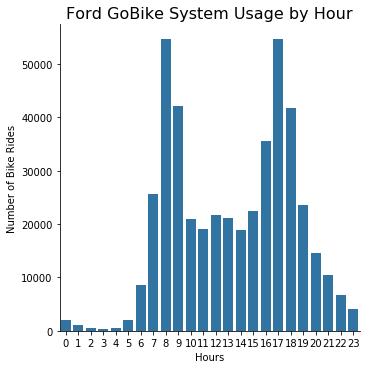

In [6]:
# Hour wise usage
ax = sns.catplot(data = df, x='start_time_hour', kind='count', color = base_col)
ax.set_axis_labels('Hours', 'Number of Bike Rides')
plt.title('Ford GoBike System Usage by Hour', fontsize=16);

### Ford Gobike Trip ddistance in KM

- 75% of total distance is 2.27 km
- average of bike trip distance is 1.4 km

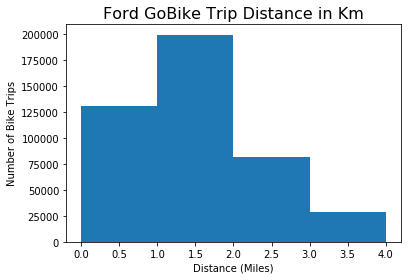

In [7]:
# Distance in km traveled
bin_e = np.arange(0, 5, 1)

plt.hist(data = df, x = 'distance_km', bins = bin_e);

plt.title("Ford GoBike Trip Distance in Km", fontsize=16)
plt.xlabel('Distance (Miles)')
plt.ylabel('Number of Bike Trips');

## Subscribers vs Customers 

- 90% of user_type in this dataset are Subscribers and 10% customers

In [8]:
# separate df of customer and subscriber
customer = df.query('user_type == "Customer"')['bike_id'].count()
subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df['bike_id'].count()
subscriber_prop = subscriber / df['bike_id'].count()

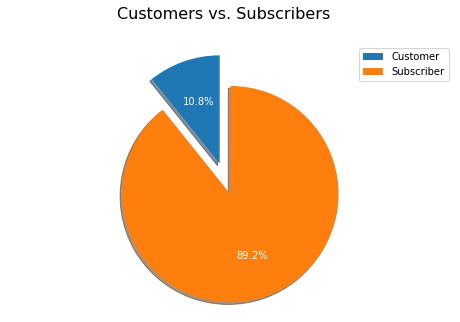

In [10]:
# Pie chart customer and subscriber
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')
plt.legend()
plt.suptitle('Customers vs. Subscribers', fontsize=16);

## Subscribers vs Customers - weekday usage

- Customer tends to ride ford gobike the same amount each day no variation
- Subscriber tends to ride more in work days

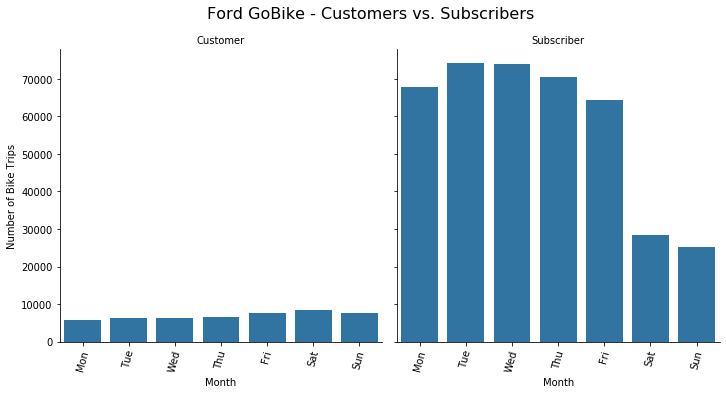

In [11]:
# Customer Usage by daywise vs. Subscriber Usage by daywise

g = sns.catplot(data=df, x='start_time_days', col="user_type", kind='count', order = days, sharey = True, color = base_col);

g.set_axis_labels("Month", "Number of Bike Trips");
g.set_titles("{col_name}");

g.fig.suptitle('Ford GoBike - Customers vs. Subscribers', y=1.05, fontsize=16);
g.set_xticklabels(rotation=75);

## Subscribers vs Customers - Trip Duration minutes-wise usage

- average distance of customer is slightly higher then subscriber
- since customer tends to ride more distance so more time too
- customer of average rides more then 75% of subscriber

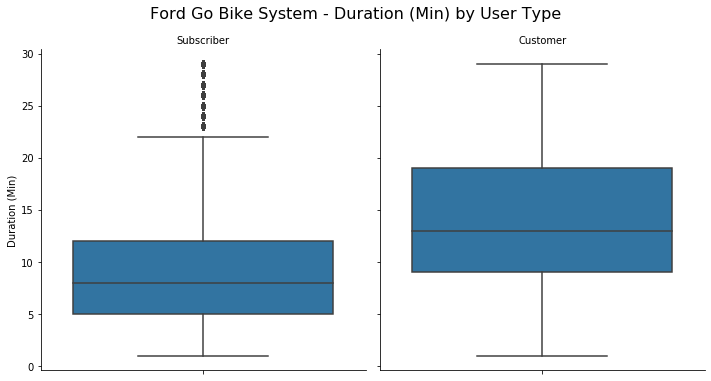

In [12]:
#customer vs subscriber boxplot 
data = df.query('duration_min < 30')

g = sns.catplot(data=data, y='duration_min', col="user_type", kind='box', color = base_col)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=1.05, fontsize=16);

In [13]:
# This highly unusual to ride a bike after 80 years so i vl be dropping all those with age > 80
df.drop(df[df['member_age']>=80].index, inplace = True)

In [14]:
# distribution age to age bins
df['age_bins'] = df['member_age'].apply(lambda x: '15 - 25' if 15<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56 - 66' if 55<x<=66
                                                  else '66 - 80' if 66<x<=80
                                                      else x)

## Subscriber - Seven-Month Bike Trips Per Subscriber Age Group

- Subscriber of age group of 26-35 years old are the most common age group to use the bike sharing system.
- Age group of 26-35 years spike in month of October end-summer.
- The youngest age group, the 15-25 years olds starts off with very few rides.

In [15]:
#Creating subscriber age df
subscriber_age_df = df[df['user_type'] == 'Subscriber'].groupby(['start_time_month', 'age_bins']).agg({'bike_id':'count'}).reset_index()

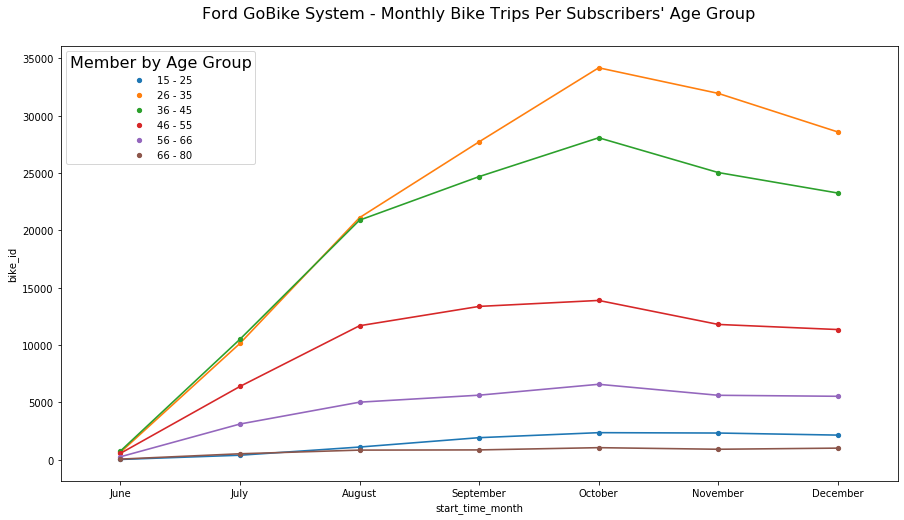

In [16]:
# Comparing monthly number of bike trips per subscribers, on age group
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))

months = ['June', 'July', 'August', 'September', 'October', 'November', 'December']

ax = sns.pointplot(data = subscriber_age_df, x='start_time_month', y='bike_id', hue='age_bins', scale=.6, order = months, height=5, aspect=2);

ax.set_title("Ford GoBike System - Monthly Bike Trips Per Subscribers' Age Group", y = 1.05, fontsize = 16);
# Legend
leg = ax.legend()
leg.set_title('Member by Age Group', prop={'size': 16})

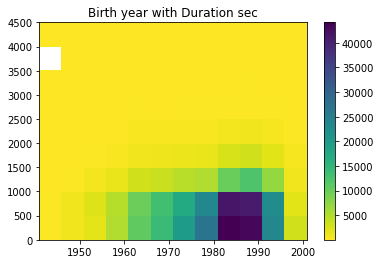

In [17]:
# Relation of birth year with duration sec 
xbin = np.arange(1941, df['member_birth_year'].max()+5, 5)
ybin = np.arange(0, 4039.5+500, 500)
plt.hist2d(data = df,x = 'member_birth_year',y='duration_sec',cmin=0.5,cmap = 'viridis_r',bins=[xbin, ybin]);
plt.colorbar()
plt.title('Birth year with Duration sec');

- there is high concentration young people(1980-2000) that have a travel duration between 0-1250~s

## Subscribers vs Customers on Week of Day and Day of Hour

- As from previous and now Subscribers ride much shorter/quicker excursions contrasted customers on each day of the week . Both user types had an obvious increase of trip duration on Saturdays and Sundays (or weekends), especially casual customers. Subscriber use was more effective than clients by and large and kept up an entirely reliable normal span Monday through Friday.

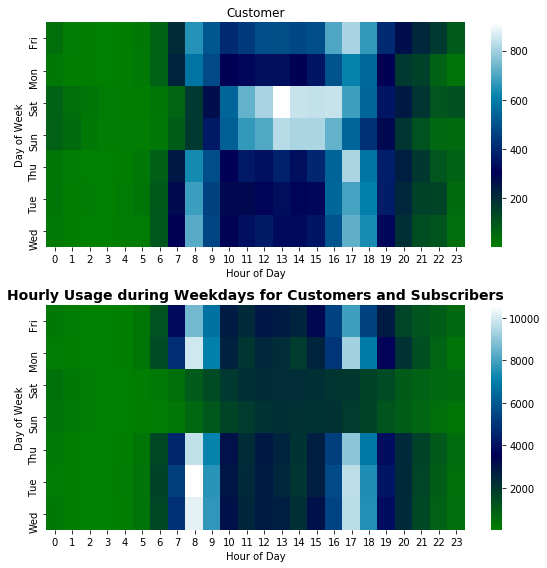

In [18]:
# Figure
plt.figure(figsize=[8, 8]);
# first subplot 
plt.subplot(2, 1, 1)
customers = df.query('user_type == "Customer"')
customers_df = customers.groupby(['start_time_days', 'start_time_hour']).size()
customers_df = customers_df.reset_index(name='count')
customers_df = customers_df.pivot(index='start_time_days', columns='start_time_hour', values='count')
sns.heatmap(customers_df, cmap='ocean');
plt.title('Customer', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();
# second subplot
plt.subplot(2, 1, 2)
subscribers = df.query('user_type == "Subscriber"')
subscriber_df = subscribers.groupby(['start_time_days', 'start_time_hour']).size()
subscriber_df = subscriber_df.reset_index(name='count')
subscriber_df = subscriber_df.pivot(index='start_time_days', columns='start_time_hour', values='count')
sns.heatmap(subscriber_df, cmap='ocean');
plt.title('Subscriber', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();
plt.title('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

## Summary

We got the dataset of only seven months of 2017. And this data we found there were 4 times the of subscriber than that of Customer. There was a lot more subscribers using the bike sharing system than casual customers overall. Obviously different usage patterns and riding habits are observed between the two types of riders. Subscribers used the system heavily on work days concentrated around 8-9am and 5-6pm for work commute, whereas customers ride a lot over weekends and in the afternoon for leisure/touring purposes. Subscribers tended to have much shorter/quicker trips compared to customers which makes subscriber usage more efficient. No. of subscriber driver in week is like to max in working days and least in weekands

From the plot Subscribers that are aged in group between 26-35 years old are the most common age group to use the bike sharing system. The 26-35 years old also tends lead the spike which occurs across all age groups in October As these age are the working age. Subscribers who fall in the 36-45 year old age group are the next most common age group to use the bike sharing system, and follow a similar trend at the 26-35 year olds.

Glancing back at plots, jumping for other sexual orientation at a more established is an astonishment. Furthermore, for supporters the outing length is higher than client for more established age is a shock

In [40]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --template output-toggle.tpl --post serve

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 584253 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
